In [104]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from get_homography import *
from stitch3 import *
import sys
sys.path.append('gradient_blending')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
img1=cv2.imread('images/mountain-left.jpg')
img2=cv2.imread('images/mountain-middle.jpg')
img3=cv2.imread('images/mountain-right.jpg')
# img1=cv2.imread('images/firewatch-left.jpg')
# img2=cv2.imread('images/firewatch-middle.jpg')
# img3=cv2.imread('images/firewatch-right.jpg')
# img1=cv2.imread('images/small-left.jpg')
# img2=cv2.imread('images/small-middle.jpg')
# img3=cv2.imread('images/small-right.jpg')
# img1=cv2.imread('images/web-left.jpg')
# img2=cv2.imread('images/web-middle.jpg')
# img3=cv2.imread('images/web-right.jpg')

HLM = get_homography(img1,img2)
HMR = get_homography(img2,img3)

5459
5468
Rmax1.4142135623730951
(485,)
(465,)
MaxInlierCount465
Final H[[ 1.12505442e+00 -5.40317519e-02 -1.64258994e+02]
 [ 1.06620547e-01  1.07927531e+00 -3.08375588e+00]
 [ 3.44737305e-04 -4.28673397e-05  1.00000000e+00]]
5468
5799
Rmax1.4142135623730951
(1256,)
(1246,)
MaxInlierCount1246
Final H[[ 1.12053886e+00 -1.17851843e-02 -1.52954572e+02]
 [ 6.14409595e-02  1.07146324e+00  8.16682306e+00]
 [ 3.29216295e-04 -4.96468079e-05  1.00000000e+00]]


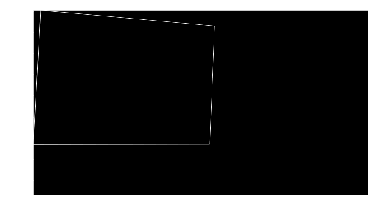

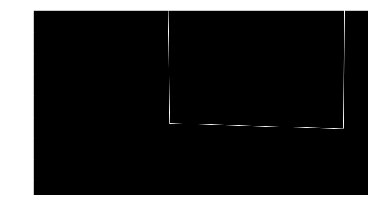

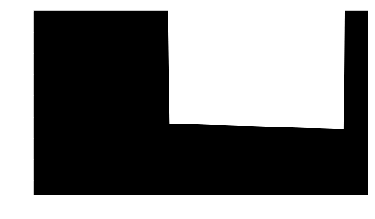

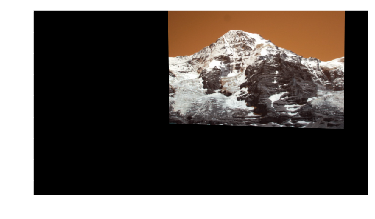

(279, 247)
(272, 259)


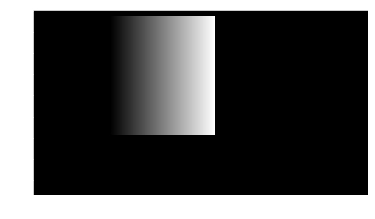

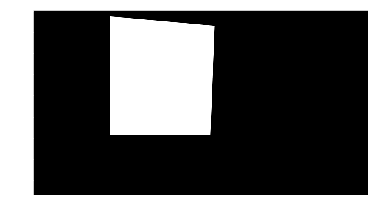

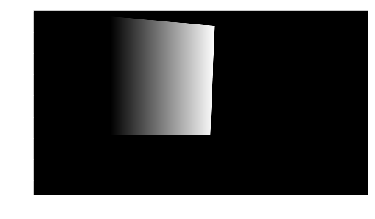

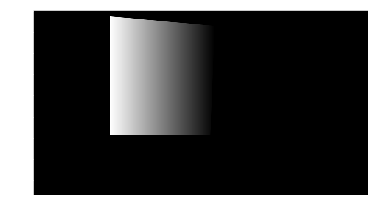

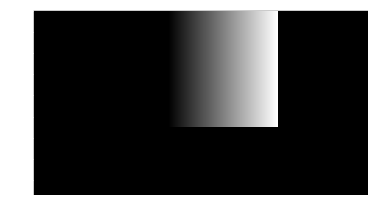

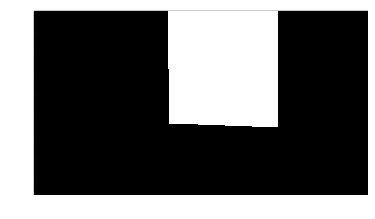

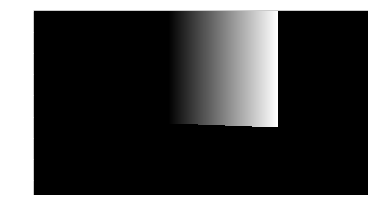

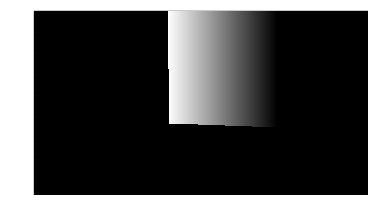

True

In [122]:
canvas,poisson = stitch3(img1,img2,img3,HLM,HMR)

cv2.imwrite("res.png",canvas)
cv2.imwrite("poison.png",poisson)

In [107]:
# Sclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# canvas[:,:,0] = clahe.apply(canvas[:,:,0])
# canvas[:,:,1] = clahe.apply(canvas[:,:,1])
# canvas[:,:,2] = clahe.apply(canvas[:,:,2])
# # canvas[:,:,0] = cv2.equalizeHist(canvas[:,:,0])
# # canvas[:,:,1] = cv2.equalizeHist(canvas[:,:,1])
# # canvas[:,:,2] = cv2.equalizeHist(canvas[:,:,2])

In [108]:
f = np.array([[1,2,3],[4,5,6]])
a = np.linspace(0,1,f.shape[1])
np.multiply(f,a)
print(1-a)


[1.  0.5 0. ]


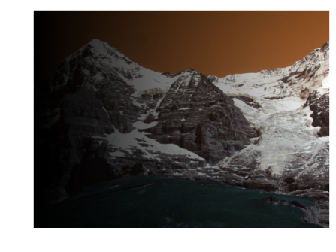

In [109]:
a = np.linspace(0,1,img1.shape[1])
f = np.ones((img1.shape[0],img1.shape[1]))
f=f*a
f3 = np.zeros((img1.shape[0],img1.shape[1],3))
f3[:,:,0]=f
f3[:,:,1]=f
f3[:,:,2]=f
r=f3*img1
plt.imshow(r.astype('int'))


In [110]:
plt.imshow(g)   

TypeError: Invalid shape (600, 450, 1350) for image data